Привет! 

Меня зовут Маковеев Кирилл, я буду проверять твой проект ; ) Моя основная цель — не указать на совершенные тобою ошибки, а помочь тебе стать аналитиком данных.

Если тебе комфортно, можешь обращаться ко мне на «ты» - тогда и я буду к тебе так обращаться, но если нет, то обязательно дай знать.

Пожалуйста, не удаляй комментарии, которые я буду оставлять в работе, это особенно поможет, если твои проекты будут отправлены на повторную проверку.

Кстати, ты тоже можешь реагировать на мои комментарии, но в таком случае постарайся, чтобы твои комментарии отличались: например, выделяй их любимым цветом — тогда у нас не возникнет путаницы. 

Набор моих цветов:
<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>
    
Решение на отдельном шаге является полностью правильным. </div>

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
Решение может стать еще лучше с некоторыми корректировками </div>

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 
    
В случае, если решение какого-то шага требует значительных изменений. Проект не может быть принят с первого раза, если ревью содержит комментарии, помеченные этим цветом </div>
___

<div class="alert alert-info">
<b>Кирилл, привет! Ответы и поправки от меня буду выделять синим. </b>
<br>
</div>


# Исследование определяющих закономерностей успешности игры

Вы нашем распоряжении данные из интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года и нужно спланировать кампанию на 2017 год. Нужно проанализировать, сколько игр выпускалось в разные годы, как менялись продажи по платформам, построить график по глобальным продажам, посмотреть общее распределение по жанрам, составить портрет пользователя для пользователя каждого региона, изучить пользовательские рейтинги платформ.

**План работы:**

- Изучение общей информации о файле
- Предобработка данных (переименуем столбцы в соответствии с хорошим стилем, изменим типы данных в нужных столбцах, заполним пропуски в столбцах, удалим строки с пропущенными названиями игр, создадим столбец с подсчетом суммарных продаж по регионам)
- Исследовательский анализ данных (сколько игр выпускалось в разные периоды, как менялись продажи по платформам, выберем актуальный период для прогноза на 2017 год, выведем лидирующие по продажам платформы, пострим графики о глобальных продажах, проанализируем влияние на продажу внутри одной платформы отзывы пользователей и критиков, соотнесем выводы с продажами игр на других платформах, посмотрим на общее распределение игр по жанрам)
- Составление портрета пользователя каждого региона (Северная Америка, Европа, Япония)
- Проверка гипотез (про средние рейтинги платформ Xbox One и PC, про жанры 'Action' и 'Sports')
- Общий вывод по итогам исследования

## Изучим общую информацию о файле

 ### Импортируем библиотеки

In [390]:
import pandas as pd

In [391]:
import numpy as np

In [392]:
import matplotlib.pyplot as plt

In [393]:
from scipy import stats as st

### Откроем файл с данными

In [394]:
data = pd.read_csv('/datasets/games.csv')

### Выведем первые 10 строк датасета

In [395]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Выведем общую информацию о датасете

In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Подведем итог. В таблице 11 столбцов, согласно докумментации:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Очень хорошо, что ты добавляешь описание данных - это упрощает понимание проекта для тех, кто с ним ознакамливается.</div>

**Вывод**

Вывели основную информацию о датафрейме. В данных присутствуют противоречивые данные:
- много пропусков
- все названия столбцов начинаются с прописных букв
- не соответствие в некоторых столбцах типа данных, предназначенного для анализа.

## Предобработка данных

### Выведем все названия столбцов на экран

Будем приводить таблицу в надлежащий вид перед анализом данных, а именно:
- переименуем столбцы в соответствии с хорошим стилем
- изменим типы данных в столбцах 'year_of_release' и 'user_score'
- заполним пропуски в столбцах 'year_of_release', 'user_score', 'genre'
- удалим две строки с пропущенными названиями игр
- создадим столбец с подсчетом суммарных продаж по регионам
- посмотрим на уникальные значения в столбце 'rating'

In [397]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

### Переименуем все столбцы в соответствии с хорошим стилем

In [398]:
# data.columns = map(str.lower, data.columns)

In [399]:
data.columns = data.columns.str.lower()

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
   
Добавлю, что можно сделать это и без map: data.columns = data.columns.str.lower() </div>

<div class="alert alert-info">
<b>Исправила код </b>
<br>
</div>

### Проверим изменения, выведем названия столбцов на экран

In [400]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменим в нужных столбцах тип данных и заполним пропуски

В столбце 'year_of_release' тип данных изменим на 'int64' и удалим пропуски (их около 1.6% от всего объема данных)

In [401]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

<div class="alert-success"> 
<b>Комментарий ревьюера 👍</b>

Согласен. Там, где пропусков мало и восстановить их не представляется возможным, релевантным будет их удалить.

In [402]:
data['year_of_release'] = data['year_of_release'].astype('int64')

В столбце 'user_score' изменим тип данных на 'числовой' для удобства расчетов

In [403]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

Выведем количество пропущенных значений на экран

In [404]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

В столбцах 'genre' заменим пропуски на 'unknow'

In [405]:
columns_to_replace = ['genre']
for column in columns_to_replace:
    data[column] = data[column].fillna('unknow')

В столбце 'user_score', помимо 'NaN', встречается значение 'tbd', что означает 'To Be Determined', то есть 'Будет определено'. Такой рейтинг устанавливается, если игра еще не выпустилась, или готовится к релизу какое-либо дополнение, однако пока не известно, когда именно оно будет выпущено, поэтому заменим значения 'tbd' на 'Nan'.

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Да, TBD можно интерпретировать как игры, ожидающие оценки. 

In [406]:
data.loc[data['user_score']=='tbd', 'user_score'] = np.nan

Удалим две строки с пропущенными названиями игр, так как не понятно о какой игре идет речь.

In [407]:
data.dropna(subset=['name'], inplace=True)

Посмотрим на уникальные значения в столбце 'rating'

In [408]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В столбце 'rating' есть два значения 'K-A' и 'E10+'. Первоначально использовалось "K-A" ("Kids to Adults"), потом было переименовано на E10+. Поэтому предлагаю переименовать 'K-A' в 'E10+' для удобного и более точного анализа в дальнейшем.

In [409]:
data['rating'] = data['rating'].replace(['K-A'], 'E10+')

In [410]:
columns_to_replace = ['rating']
for column in columns_to_replace:
    data[column] = data[column].fillna('unknow')

Пропуски в столбцах с рейтингами пользователей и критиков запонять не будем, что бы не искажать картину с данными. Тем более нужно отметить, что все игры, выпущенные ранее 1996 года, вообще не имеют рейтинга.

Причинами возникновения пропусков являются: невозможность их получения или ошибки в обработке данных, искажение информации, поломки технического оборудования, экономические причины.

### Посчитаем суммарные продажи по регионам

In [411]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Хорошо, что ты прописываешь метод sum с указанием axis суммирования по строкам, а не просто используешь оператор сложения.

In [412]:
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16441     0.01
16442     0.01
16443     0.01
16444     0.01
16445     0.01
Name: total_sales, Length: 16444, dtype: float64

**Вывод**

Изменили в столбцах типы данных, удобные для анализа, удалили, где нужно пропуски, добавили столбец с рассчетом суммарных продаж по регионам. Можно приступать к исследовательскому анализу данных.

## Исследовательский анализ данных

Проведем исследовательский анализ данных:
- посмотрим, сколько игр выпускалось в разные периоды
- рассмотрим, как менялись продажи по платформам
- выберем актуальный период для прогноза на 2017 год
- выведем лидирующие по продажам платформы
- пострим графики о глобальных продажах
- проанализируем влияние на продажу внутри одной платформы отзывы пользователей и критиков
- соотнесем выводы с продажами игр на других платформах
- посмотрим на общее распределение игр по жанрам

Построим гистограмму для просмотра, сколько игр выпускалось в разные годы. Зададим период от самого раннего года выпуска до самого позднего.

<AxesSubplot:>

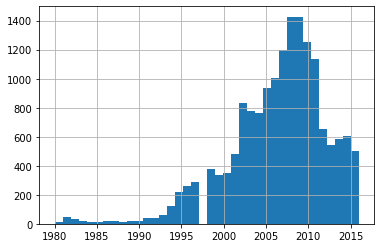

In [413]:
data['year_of_release'].hist(bins = 38, range=(1980, 2016))

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
Хорошо, что ты визуализируешь эти данные! В данном случае график с непрерывной линией был бы предпочитетельнее - поскольку речь идет именно о динамике на временном отрезке (но можно оставить и такую диаграмму с методом hist).

Из графика видно, что выпуск игр стал увеличиваться с 1995 года, а до него выпуск игр был незначительным. Активный рост выпуска начиначется с 2000 года.

<AxesSubplot:>

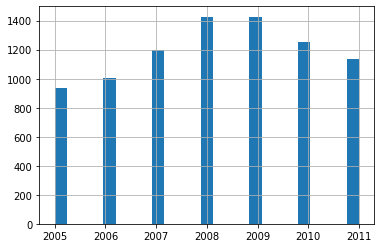

In [414]:
data['year_of_release'].hist(bins = 25, range=(2005, 2011))

Самый важный период с 2005 по 2011. Именно в эти годы самый большой выпуск игр.

Теперь рассмотрим, как менялись продажи по платформам.

Группируем данные по платформам по общему числу продаж.

In [415]:
platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()

In [416]:
platform_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


<AxesSubplot:title={'center':'platform_sales'}, xlabel='platform'>

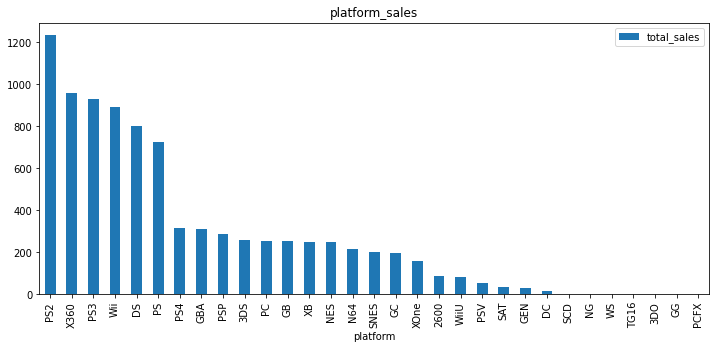

In [417]:
platform_sales.plot(x='platform', y='total_sales', kind='bar', figsize=(12,5), title='platform_sales')

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
Эти данные стоит тоже визуализировать - например, в виде столбчатой диаграмы.

<div class="alert alert-info">
<b>Построила график </b>
<br>
</div>

Из выборки видно, что наибольшее число продаж у 5 платформ: PS2, X360, PS3, Wii, DS. Сделаем срез и построим граффик суммарных продаж по этим платформам.

In [418]:
platform_sales_top = platform_sales[0:5]

<AxesSubplot:title={'center':'platform_sales_top'}, xlabel='platform'>

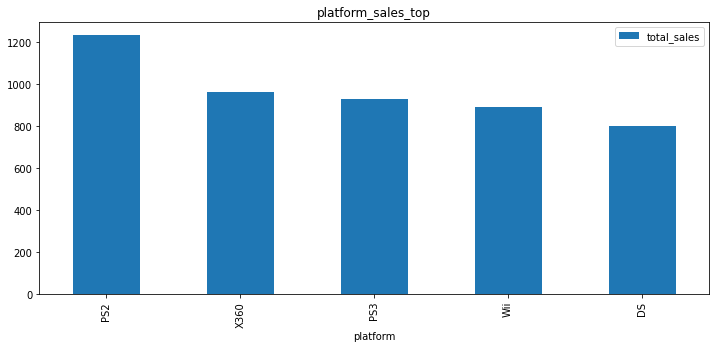

In [419]:
platform_sales_top.plot(x='platform', y='total_sales', kind='bar', figsize=(12,5), title='platform_sales_top')

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
Не забывай добавлять названия графикам через title.

<div class="alert alert-info">
<b>Добавила название </b>
<br>
</div>

Сделаем срез для выбранных 6 платформ из общей таблицы и построим график по годам.

In [420]:
data_new = data.query("platform == ['PS2', 'X360', 'PS3', 'Wii', 'DS']")

In [421]:
platform_top_releases = data_new.pivot_table(index='year_of_release', values = 'total_sales', columns='platform', aggfunc='sum')

In [422]:
platform_top_releases

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41


(1999.0, 2017.0)

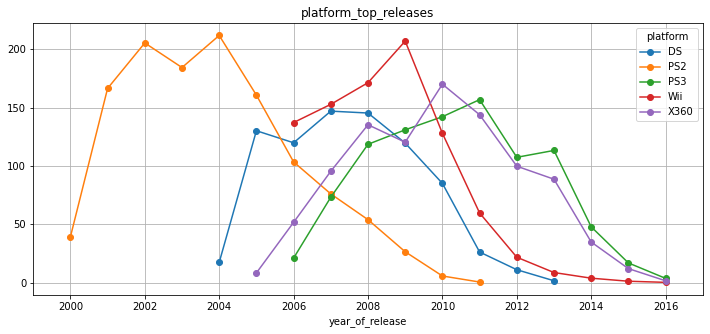

In [423]:
platform_top_releases.plot(grid=True, style='-o', figsize=(12, 5), title='platform_top_releases')
plt.xlim(1999, 2017)

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
Ты выбираешь хороший тип графика, но стоило бы ограничить ось абсцисс - сделать так, чтобы временной промежуток начинался как минимум с 1999-2000 года для большей наглядности и чтобы данные не были визуально смещены вправо.

<div class="alert alert-info">
<b>Добавила название, ограничила ось абсцисс </b>
<br>
</div>

Из графика видно, что в основном действия платформы около 10 лет.

Для прогнозирования данных на 2017 год возьмем данные за последние 5 лет, как наиболее актуальные для этого периода. Остальные данные учитывать в работе не будем. Для анализа возьмем самые популярные платформы. Продажи DS заканчиваются в 2013 году, поэтому эту платфрму можно исключить из списка.

In [424]:
data_actual = data.query("year_of_release >= 2014")

<div class="alert-warning"> 
<b>Комментарий ревьюера 💡</b> 
    
Для целей прогнозирования продаж на следующий год даже в традиционных моделях бизнеса редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды, которые зависят не только от выхода новой игровой платформы.

В данном случае идеальным периодом будет считаться 2014-2016 гг./2015-2016 гг - т.е. период в 2-3 года с сохранением данных за 2016 г.
    
Но критической ошибкой выбор периода с 2012 года считаться не будет.

<div class="alert alert-info">
<b>Исправила диапазон с 2014 года </b>
<br>
</div>

In [425]:
data_forecast = data.query("platform in ['PS2', 'X360', 'PS3', 'Wii'] and year_of_release >= 2014")

In [426]:
data_forecast = data_forecast.pivot_table(index='year_of_release', values = 'total_sales', columns='platform', aggfunc='sum')

In [427]:
data_forecast

platform,PS3,Wii,X360
year_of_release,,,
2014,47.76,3.75,34.74
2015,16.82,1.14,11.96
2016,3.60,0.18,1.52


<AxesSubplot:xlabel='year_of_release'>

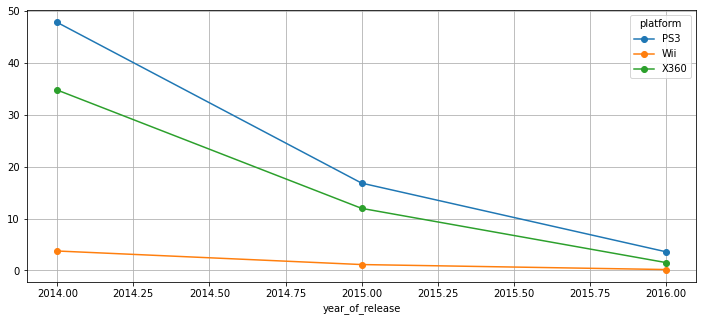

In [428]:
data_forecast.plot(grid=True, style='-o', figsize=(12, 5))

Из графика видно, что продажи возросли к 2014 году, а после началось резкое падение продаж. Самые высокие продажи наблюдаются на платформе PS3 и X360. А платформа Wii по продажам находится практически на одном и том же уровне.

Построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам.

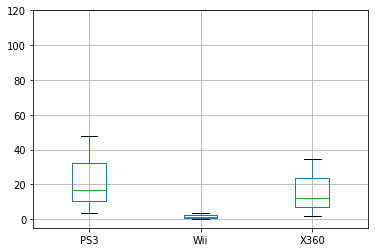

In [429]:
data_forecast.boxplot()
plt.ylim(-5, 120)
plt.show()

In [430]:
data_forecast.describe()

platform,PS3,Wii,X360
count,3.000000,3.000000,3.000000
mean,22.726667,1.690000,16.073333
std,22.664795,1.847458,16.987694
min,3.600000,0.180000,1.520000
25%,10.210000,0.660000,6.740000
50%,16.820000,1.140000,11.960000
75%,32.290000,2.445000,23.350000
max,47.760000,3.750000,34.740000


Медианные значения у платформ PS3 и Х360 самые высокие. Самыми прибыльной платформами является PS3 и Х360.

Рассмотрим, как влияют на продажи внутри одной платформы отзывы пользователей и критиков.

Анализ будем проводить на примере платформы PS3

Посмотрим диаграмму рассеяния и посчитаем корреляцию между отзывами критиков и продажами.

In [431]:
data_ps_3 = data_actual.query('platform == "PS3"')

<AxesSubplot:xlabel='critic_score'>

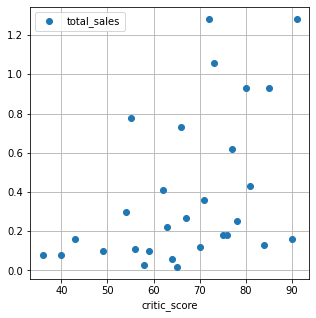

In [432]:
data_ps_3.pivot_table(index='critic_score', values='total_sales', aggfunc='sum').plot(grid=True, style='o', figsize=(5,5))

In [433]:
corr_critic_ps_3 = data_ps_3['critic_score'].corr(data_ps_3['total_sales'])

In [434]:
corr_critic_ps_3

0.44657460493190704

<AxesSubplot:xlabel='user_score'>

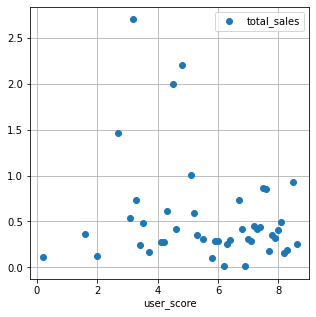

In [435]:
data_ps_3.pivot_table(index='user_score', values='total_sales').plot(grid=True, style='o', figsize=(5,5))

In [436]:
corr_user_ps_3 = data_ps_3['user_score'].corr(data_ps_3['total_sales'])

In [437]:
corr_user_ps_3

-0.16676141347662118

Корреляция между оценками критиков и продажами близка к средней. Чем выше отзывы критиков, тем выше продажи. А между продажами и оценками пользователей корреляция очень слабая, еще и отрицательная. В целом, при прогнозе продаж несколько надежнее полагаться на отзывы критиков.

Аналогично посмотрим корреляции и на других популярных платформах.

Корреляцию между оценкками и продажами по платформе Wii считать не имеет смысла, так как с 2014 отсутствуют данные по оценкам критиков, а по данным пользователей всего две оценки, а остальные отсутствуют или не определены.

In [445]:
#data_wii = data_actual.query("platform == 'Wii'")

In [446]:
#corr_critic_wii = data_wii['critic_score'].corr(data_wii['total_sales'])

In [447]:
#corr_critic_wii

In [448]:
#corr_user_wii = data_wii['user_score'].corr(data_wii['total_sales'])

In [449]:
#corr_user_wii

<div class="alert alert-info">
<b>Из-за уменьшения диапазона до 2014 года корреляцию Wii посчитать невозможно, отредактировала вывод, закомментировала код</b>
<br>
</div>

Корреляция между оценкками и продажами по платформе X360

In [450]:
data_x_360 = data_actual.query("platform == 'X360'")

In [451]:
corr_critic_x_360 = data_x_360['critic_score'].corr(data_x_360['total_sales'])

In [452]:
corr_critic_x_360

0.5257228356581523

In [453]:
corr_user_x_360 = data_x_360['user_score'].corr(data_x_360['total_sales'])

In [454]:
corr_user_x_360

-0.138444570945665

Итак, можно сделать вывод, что по другой популярной платформе X360 корреляция между оценкками критиков и продажами, выше, чем корреляция между оценкками пользователей и продажами.

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Верно, согласен.

Теперь перейдем к рассмотрению общего распределения по жанрам. Здесь будем проводить оценку по медианному значению, так как за высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Лучше рассмотрим жанры, где игры стабильно приносят высокий доход.

In [455]:
data_genre_1 = data.pivot_table(index='genre', values = 'total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).reset_index()

In [456]:
data_genre_1

,genre,total_sales
0,Platform,0.27
1,Shooter,0.24
2,Sports,0.22
3,Fighting,0.21
4,Action,0.19
5,Racing,0.19
6,Role-Playing,0.18
7,Misc,0.16
8,Simulation,0.15
9,Puzzle,0.10


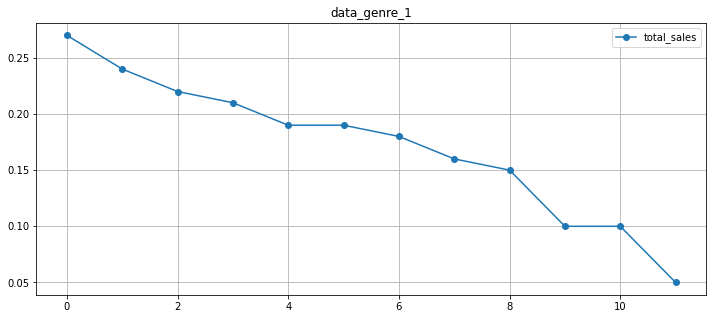

In [457]:
data_genre_1.plot(grid=True, style='-o', figsize=(12, 5), title='data_genre_1')
plt.show()

Самые стабильные жанры по доходности - 'Platform', 'Shooter' и 'Sports'. А самая низкая медиана у игр жанра 'Adventure'. 

In [458]:
data_genre_2 = data_actual.pivot_table(index='genre', values = 'total_sales', aggfunc='median').sort_values(by='total_sales', ascending=False).reset_index()

In [459]:
data_genre_2

,genre,total_sales
0,Shooter,0.515
1,Sports,0.180
2,Platform,0.140
3,Fighting,0.125
4,Role-Playing,0.110
5,Simulation,0.100
6,Action,0.090
7,Misc,0.090
8,Racing,0.090
9,Strategy,0.060


<AxesSubplot:title={'center':'data_actual'}, ylabel='total_sales'>

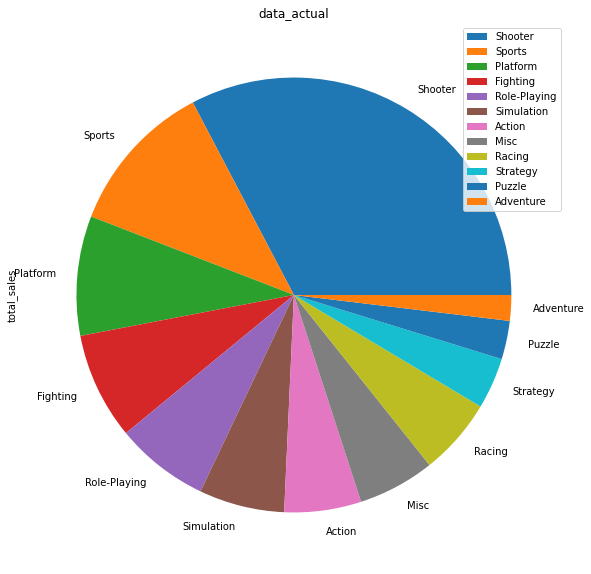

In [460]:
data_actual.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(ascending=False, by = 'total_sales').plot(kind='pie', figsize=(10,10), y= 'total_sales', title='data_actual')

Если рассматривать период с 2014 года, то картина несколько изменилась. 'Shooter' стал самым топовым жанром, а 'Platform' и 'Shooter' значительно снизили свои позиции. А 'Adventure' так и остается низкодоходным жанром.

<div class="alert-danger">
<b>Комментарий ревьюера ❌</b>

Общие продажи - не лучшая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные значения.

<div class="alert alert-info">
<b>Исправила на медианное значениеб переписала вывод</b>
<br>
</div>

**Вывод**

В основном возраст платформы около 10 лет. Самыми популярными являются PS3, Wii и Х360. Чем выше отзывы критиков, тем выше продажи. Отзывы пользователей на продажи практически не влияют. Самые стабильные жанры по доходности - 'Platform', 'Shooter' и 'Sports'. А самая низкая медиана у игр жанра 'Adventure'.

## Портрет пользователя для каждого региона

Теперь составим портрет пользователя для каждого региона (Северная Америка, Европа, Япония).

Топ-5 популярных платформ по регионам

In [461]:
p_platform_na = data_actual.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').reset_index()

In [462]:
p_platform_na.head()

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


In [463]:
p_platform_eu = data_actual.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').reset_index()

In [464]:
p_platform_eu.head()

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12


In [465]:
p_platform_jp = data_actual.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').reset_index()

In [466]:
p_platform_jp.head()

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


В Северной Америке и Европе самымой популярной платформмой являются 'PS4', на втором месте - 'XOne'. В Японии самой популярной платформой является '3DS'. Относительно свежая 'PS4' уже набрала популярность во всех регионах. В Японии более популярны мобильные консоли, чем и является '3DS', а в Северной Америке и Европе - стационарные консоли.

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Верно!

<div class="alert alert-info">
<b>Изменила вывод, так как изменился рассматриваемый период</b>
<br>
</div>

Топ-5 популярных жанров по регионам

In [467]:
p_genre_na = data_actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'na_sales').reset_index()

In [468]:
p_genre_na.head()

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


In [469]:
p_genre_eu = data_actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'eu_sales').reset_index()

In [470]:
p_genre_eu.head()

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


In [471]:
p_genre_jp = data_actual.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'jp_sales').reset_index()

In [472]:
p_genre_jp.head()

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


Топ-3 в Северной Америке и Европе полностью совпадает по жанрам ('Action', 'Shooter' и 'Sports'). А в Японии самый популярный жанр. Это связано с различным менталитетом в странах.

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Приавльный промежуточный вывод. Япониия в этом смысле действительно отличается.

Теперь рассмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [473]:
p_raiting = data_actual.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'], aggfunc = 'sum')

In [474]:
p_raiting

,eu_sales,jp_sales,na_sales
rating,,,
E,58.06,8.94,50.74
E10+,26.16,4.46,33.23
M,93.44,8.01,96.42
T,34.07,14.78,38.95
unknow,58.95,56.90,64.72


В Европе и Северной Америке самый высокий рейтинг продаж у игр для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. А в Японии рейтинг ESRB на продажи практически не влияет. Так же можно сделать вывод, что значительные объемы продаж занимают игры без рейтинга.

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 
    
Тут стоит включить в анализ те игры, для которых рейтинг не определен. При твоем способе подсчета игры без рейтинга оказываются полностью исключенными из анализа. То есть нужно поработать с пропусками. Потому что это может указать на ключевое различие в регионах, если, например, игр без рейтинга ESRB где-либо будет продано больше, чем с этим рейтингом.

<div class="alert alert-info">
<b>Заполнила в предобработке пропуски на unknow, дописала вывод</b>
<br>
</div>

**Вывод**

В Северной Америке и Европе самымой популярной платформмой являются 'PS4', на втором месте - 'XOne'. В Японии самой популярной платформой является '3DS'. Относительно свежая 'PS4' уже набрала популярность во всех регионах. В Японии более популярны мобильные консоли, чем и является '3DS', а в Северной Америке и Европе - стационарные консоли. Топ-3 в Северной Америке и Европе полностью совпадает по жанрам ('Action', 'Shooter' и 'Sports'). А в Японии самый популярный жанр. Это связано с различным менталитетом в странах. В Европе и Сеаерной Америке самый высокий рейтинг продаж у игр для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. А в Японии рейтинг ESRB на продажи практически не влияет. Так же можно сделать вывод, что значительные объемы продаж занимают игры без рейтинга.

## Проверка гипотезы

Теперь проверим гипотезы:
- Средние пользовательсие рейтинги Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров 'Action' и 'Sport' разные

В обеих гипотезах нужно сравнить средние двух независимых генеральных совокупностей между собой, средние значения которых нормально распределены. Поэтому будем использовать критерий Стьюдента - 'ttest_ind'.

### Гипотеза № 1

<div class="alert-danger"> 
<b>Комментарий ревьюера ❌</b> 
    
Допиши пожалуйста тут обоснование выбора критерия Стьюдента, испольнованного тобой. Почему именно ttest_ind подходит? Это часть задания.

<div class="alert alert-info">
<b>Дописала про выбор критерия</b>
<br>
</div>

Н0 - Средние пользовательсие рейтинги Xbox One и PC одинаковые

Н1 - Средние пользовательсие рейтинги Xbox One и PC отличаются

In [475]:
XOne = data_actual[(data_actual['platform'] == 'XOne') &  (data_actual['user_score'] > 0)]['user_score']

In [476]:
PC = data_actual[(data_actual['platform'] == 'PC') &  (data_actual['user_score'] > 0)]['user_score']

In [477]:
XOne.mean()

6.594545454545456

In [478]:
PC.mean()

6.298360655737705

In [479]:
alpha = .05

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Результат говорит о том, что нулевая гипотеза не отвергается.

### Гипотеза № 2

Н0 - Средние показатели рейтингов жанров 'Action' и 'Sports' одинаковые

Н1 - Средние показатели рейтингов жанров 'Action' и 'Sports' разные

In [480]:
Action = data_actual[(data_actual['genre'] == 'Action') &  (data_actual['user_score'] > 0)]['user_score']

In [481]:
Sports = data_actual[(data_actual['genre'] == 'Sports') &  (data_actual['user_score'] > 0)]['user_score']

In [482]:
Action.mean()

6.760606060606061

In [483]:
Sports.mean()

5.2251968503937

In [484]:
alpha = .05

results = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Результат говорит о том, что нулевая гипотеза отвергается.

**Вывод**

В первой гипотезе:
Результат говорит о том, что нулевая гипотеза не отвергается.
p-значение: 0.5489537965134912
Во второй гипотезе:
Результат говорит о том, что нулевая гипотеза отвергается.
p-значение: 4.24307776572644e-20

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Гипотезы сформулированы верно. С выводами согласен. 

## Общий вывод

1. Мы вывели основную информацию о датасете.

2. Выявили, что в данных присутствуют противоречивые данные: много пропусков, все названия столбцов начинаются с прописных букв, не соответствие в некоторых столбцах типа данных, предназначенного для анализа. Затем переименовали столбцы в соответствии с хорошим стилем, изменили типы данных в столбцах 'year_of_release' и 'user_score' заполнили пропуски в столбцах 'year_of_release', 'user_score', 'genre', удалили две строки с пропущенными названиями игр, создали столбец с подсчетом суммарных продаж по регионам, Пропуски в столбцах с рейтингами запонять не будем, что бы не искажать картину с данными. Тем более нужно отметить, что все игры, выпущенные ранее 1996 года, вообще не имеют рейтинга, столбец с рейтингом. Причинами возникновения пропусков являются: невозможность их получения или ошибки в обработке данных, искажение информации, поломки технического оборудования, экономические причины.

3. Провели исследовательский анализ данных: сколько игр выпускалось в разные периоды, как менялись продажи по платформам, выбрали последние 5 лет, как актуальный период для прогноза на 2017 год, вывели лидирующие по продажам платформы, пострили графики о глобальных продажах, проанализировали влияние на продажу внутри одной платформы отзывы пользователей и критиков, соотнесли выводы с продажами игр на других платформах, посмотрели на общее распределение игр по жанрам.

- Выпуск игр стал увеличиваться с 1995 года, а до него выпуск игр был незначительным. Активный рост выпуска начиначется с 2000 года.
- Самый важный период с 2005 по 2011. Именно в эти годы самый большой выпуск игр.
- Наибольшее число продаж у 5 платформ: PS2, X360, PS3, Wii, DS.
- В основном действия платформы около 10 лет. Для прогнозирования данных на 2017 год возьмем данные за последние 3 года, как наиболее актуальные для этого периода. Остальные данные учитывать в работе не будем. Для анализа возьмем самые популярные платформы. Продажи DS заканчиваются в 2013 году, поэтому эту платфрму можно исключить из списка.
- Продажи возросли к 2014 году, а после началось резкое падение продаж. Самые высокие продажи наблюдаются на платформе PS3 и X360. А платформа Wii по продажам находится практически на одном и том же уровне.
- Медианные значения у платформ PS3 и Х360 самые высокие. Самыми прибыльной платформами является PS3 и Х360.
- Корреляция у платформы PS3 между оценками критиков и продажами близка к средней. Чем выше отзывы критиков, тем выше продажи. А между продажами и оценками пользователей корреляция очень слабая, еще и отрицательная. В целом, при прогнозе продаж несколько надежнее полагаться на отзывы критиков.
- По другой популярной платформе X360 корреляция между оценкками критиков и продажами, выше, чем корреляция между оценкками пользователей и продажами.
-  Оценку по жанрам проводила по по медианному значению. Самые стабильные жанры по доходности - 'Platform', 'Shooter' и 'Sports'. А самая низкая медиана у игр жанра 'Adventure'.
- С 2014 года, то картина несколько изменилась. 'Shooter' стал самым топовым жанром, а 'Platform' и 'Shooter' значительно снизили свои позиции. А 'Adventure' так и остается низкодоходным жанром.
- В Северной Америке и Европе самымой популярной платформмой являются 'PS4', на втором месте - 'XOne'. В Японии самой популярной платформой является '3DS'. Относительно свежая 'PS4' уже набрала популярность во всех регионах. В Японии более популярны мобильные консоли, чем и является '3DS', а в Северной Америке и Европе - стационарные консоли.
- Топ-3 в Северной Америке и Европе полностью совпадает по жанрам ('Action', 'Shooter' и 'Sports'). А в Японии самый популярный жанр. Это связано с различным менталитетом в странах.
- В Европе и Северной Америке самый высокий рейтинг продаж у игр для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. А в Японии рейтинг ESRB на продажи практически не влияет. Так же можно сделать вывод, что значительные объемы продаж занимают игры без рейтинга.
- В обеих гипотезах нужно сравнить средние двух независимых генеральных совокупностей между собой, средние значения которых нормально распределены. Поэтому будем использовать критерий Стьюдента - 'ttest_ind'.
- Н0 - Средние пользовательсие рейтинги Xbox One и PC одинаковые. Н1 - Средние пользовательсие рейтинги Xbox One и PC отличаются. нулевая гипотеза не отвергается. p-значение: 0.5489537965134912.
- Н0 - Средние показатели рейтингов жанров 'Action' и 'Sports' одинаковые. Н1 - Средние показатели рейтингов жанров 'Action' и 'Sports' разные. Нулевая гипотеза отвергается. p-значение: 4.24307776572644e-20

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>
    
Объемный, качественно написанный вывод! Всё отражено верно.

<div class=> 
<b>Общий комментарий ревьюера </b> 
    
Отличный проект, тобою проделана большая работа, ты молодец!

Хвалю за наличие хороших промежуточных (и общего) выводов, комментариев и рассуждений - твой проект интересно проверять. Также очень хорошее оформление проекта - в этом плане сделано все именно так, как требуется. По коду вопросов в целом нет.

Что обязательно стоит изменить: 
    
1. Включить в анализ влияния рейтинга на продажи игры без рейтинга ESRB
2. Проанализировать медианные (или средние) значения - там, где я это отметил
3. Добавить обоснование использования критерия Стьюдента

Также, я оставил некоторое количество желтых комментариев. Думаю, они будут полезны и ты также что-либо поменяешь, потому что это сделает твой проект лучше.

Буду ждать доработок :)
    
Удачи!

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 Вторая итерация</b>

Все, что я отмечал, исправлено. У тебя получился качественно сделанный проект, а теперь он стал ещё лучше. Принимаю! 
    
Успехов в дальнейшей учебе! 